<a href="https://colab.research.google.com/github/Haile-12/convex-optimization-for-svm-dual-formulation-RBF-kernel/blob/main/convex_optimization_for_svm_dual_formulation_RBF_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Convex Optimization Problem Setup

# 1.1 General Idea of a Convex Optimization Problem

A convex optimization problem:

* is a mathematical problem where the goal is to minimize a convex objective function
  subject to a set of constraints that define a feasible region, which is itself convex.

* Specifically, the problem can be formulated as:

    * **Objective Function:**  
      A convex function **f0(x)** defined on a convex domain **D ⊆ Rⁿ**.  
      The function **f0: D → R** represents the quantity to minimize (or maximize if concave).

    * **Constraints:**  
      These include
      * inequality constraints **fi(x) ≤ 0** for convex functions **fi**,and  
      * equality constraints **hj(x) = 0** where **hj** are affine functions (linear or affine).

      The set of all **x** satisfying these constraints forms the **feasible set C**, which must be convex.

---

## Mathematical Form

$$
\begin{aligned}
& \text{minimize} && f_0(x) \\
& \text{subject to} && f_i(x) \le 0, \quad i = 1, \dots, m \\
& && Ax = b
\end{aligned}
$$

---
# Key Points of This Formulation

* The objective and all inequality constraint functions are **convex**.
* The equality constraints are **affine**.
* The feasible set **C** is the intersection of convex sets, therefore **convex**.
* Because of convexity, any **local minimum** is also a **global minimum**.
* If the objective is **strictly convex**, the optimal solution is **unique**.




# **1.2 Convex Functions and Convex Optimization**

## **1.2.1. What Makes a Function Convex?**

A function is **convex** if it curves upward like a bowl and satisfies:

$$
f(t x_1 + (1-t)x_2) \le t f(x_1) + (1-t) f(x_2), \quad \forall x_1, x_2 \text{ in domain}, \, t \in [0,1]
$$

**Intuition:**  
The line segment connecting any two points on the graph **never dips below the curve**.

- **Strictly convex:** the line segment lies strictly above the curve (except at endpoints).  
- **Check convexity:** For single-variable, twice-differentiable functions, if \(f''(x) >= 0\) → convex.  
- **Examples:** \(f(x) = x^2\), \(f(x) = e^x\) are convex; \(f(x) = -x^2\) is not.
- Multivariable Case
  - For a function $f(x)$ with $x \in \mathbb{R}^n$, the Hessian matrix $H(x)$ is the matrix of second derivatives:





$$
H(x) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

If \( H(x) \) is **positive semidefinite** for all \( x \), then \( f(x) \) is convex.

---



## **1.3. Why Convex Problems Guarantee Global Optima**

- **Key idea:** In convex problems, **any local minimum is also a global minimum**.  

### **1.3.1 Convex Feasible Set + Convex Objective**

- The feasible set is convex.  
- For any two feasible points, the line segment connecting them is **entirely feasible**.  
- The convex objective function ensures **no valleys or multiple local minima** inside the feasible region.

### **1.3.2 Property of Convex Functions**

- For any two points \(x_1, x_2\) in the feasible set:

$$
f_0(t x_1 + (1-t)x_2) \le t f_0(x_1) + (1-t) f_0(x_2), \quad t \in [0,1]
$$

- This ensures the function is “bowl-shaped” and **cannot have hidden local minima**.

### **1.3.3 Geometric Reasoning for Global Optimality**

1. Let \(x^*\) be a **local minimum**:  
   $$
   f_0(x^*) \le f_0(x) \quad \text{for all nearby points } x
   $$

2. Take **any feasible point** \(y\). Because the feasible set is convex, the **line segment connecting \(x^*\) and \(y\)** lies entirely inside the feasible set.

3. Convexity ensures:  
   $$
   f_0(t x^* + (1-t)y) \le t f_0(x^*) + (1-t) f_0(y), \quad t \in [0,1]
   $$

4. For small \(t > 0\), the point \(t x^* + (1-t)y\) is near \(x^*\). By local minimality:  
   $$
   f_0(x^*) \le f_0(t x^* + (1-t)y)
   $$

5. Combining inequalities gives:  
   $$
   f_0(x^*) \le f_0(y)
   $$

- **Conclusion:** \(x^*\) is **global**, not just local.

### **1.3.4 Strict Convexity (Optional)**

- If \(f_0\) is **strictly convex**:

$$
f_0(t x_1 + (1-t)x_2) < t f_0(x_1) + (1-t) f_0(x_2), \quad t \in (0,1)
$$

- Guarantees the **global minimum is unique**.  
- Makes optimization predictable and reliable.

---

## **1.4. Takeaways**

- any local minimum of a convex function over a convex set is also a global minimum
- Convex functions + convex feasible sets **eliminate local traps**.  
- Any **local minimum is automatically global**.  
- **Strict convexity** ensures **uniqueness** of the solution.  
- Convex problems are **efficient to solve** and reliable for optimization.


## **2. Duality Concept**
_______
### **Key Idea**
Duality transforms a constrained optimization problem (**the primal**) into a related problem (**the dual**) whose solution can:

- Provide bounds on the original problem's optimal value
- Simplify computation by turning difficult constraints into easier structures
- Offer insight into how constraints affect the solution

It is a fundamental concept in optimization that associates every constrained optimization problem with a related problem.
- Leveraging duality provides both theoretical insight and practical computational advantages.

---

## **2.1 How Duality Simplifies Solving Constrained Optimization Problems**

1. **Transformation of Constraints into Dual Variables**
   - Primal constraints are incorporated into the objective function through **Lagrange multipliers**.  
   - This transforms a problem with potentially complex constraints into a form where the dual variables act as penalties or weights, making the optimization easier to reason about and solve.

2. **Alternative Problem Formulation**
   - The dual problem often has a **simpler structure**:
     - Fewer variables  
     - A more regular feasible region  
     - Smoother or separable objective function  
   - For example, in linear programming, a large primal with many constraints can have a dual with fewer constraints but more manageable variables.

3. **Strong Duality in Convex Problems**
   - For convex optimization problems that satisfy conditions such as **Slater’s condition**, the **optimal value of the dual equals the optimal value of the primal**.  
   - This eliminates the need to solve the complex primal directly; solving the dual suffices to obtain the global optimum.  
   - The dual problem can therefore serve as a simpler alternative with guaranteed correctness.

4. **Structural and Sensitivity Insights**
   - Dual variables indicate which constraints are **active or binding** at the optimum.  
   - This allows analysts to identify constraints that drive the solution and possibly simplify or reformulate the problem.

---

## **2.2 How Duality Improves Computational Efficiency?**

1. **Reduction in Problem Complexity**
   - The dual problem may have **fewer variables or simpler constraints**, significantly lowering the computational cost of solving the optimization problem.  
   - For large-scale problems, this can be the difference between a tractable and intractable solution.

2. **Decomposition and Parallelization**
   - Duality allows splitting a large problem into **smaller, independent subproblems**, each associated with a subset of constraints or variables.  
   - Subproblems can be solved **in parallel**, and their solutions coordinated through the dual variables, dramatically improving efficiency in distributed or high-performance computing environments.

3. **Algorithmic Acceleration**
   - Modern optimization algorithms exploit both primal and dual information:
     - **Primal-dual interior-point methods**  
     - **Alternating Direction Method of Multipliers (ADMM)**  
     - **Dual ascent and gradient-based dual methods**  
   - Using the dual often accelerates convergence because the dual problem can be smoother or more separable than the primal.

4. **Stopping Criteria via Duality Gap**
   - The **duality gap** — the difference between primal and dual objective values — provides a **quantitative measure of solution accuracy**.  
   - Algorithms can terminate as soon as the gap is below a threshold, avoiding unnecessary computation.

5. **Constraint Sensitivity and Prioritization**
   - Lagrange multipliers quantify the **impact of each constraint** on the optimal value.  
   - This guides computational effort toward the most influential constraints and can inform approximate or heuristic solutions for very large problems.

---
## **Summary**

- Duality **simplifies constrained optimization** by transforming constraints into dual variables, offering alternative formulations, and providing structural insights.  
- Duality **improves computational efficiency** by reducing problem complexity, enabling decomposition and parallelization, accelerating algorithm convergence, providing stopping criteria, and revealing sensitivity of constraints.  
- For convex problems, strong duality ensures that solving the dual **yields the global optimum**, making duality both theoretically powerful and practically essential in advanced optimization.



## **3. Implementation Section**
---

# 3.1 SVM as a Convex Optimization Problem

- Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
- The main goal of SVM is to maximize the margin between the two classes.
- **The larger the margin the better the model performs on new and unseen data.**
- **SVMs** are a prime example of convex optimization in AI. They find a hyperplane that maximizes the margin between two classes while maintaining correct classification.
 - Let's examine the **primal** and **dual** formulations.

---

## **Primal Formulation (Hard-Margin SVM)**

- Given a dataset of points $(x_i, y_i)$, where $y_i \in \{-1, +1\}$, the hard-margin SVM primal problem is:

$$
\begin{aligned}
\text{minimize } & \frac{1}{2} \| w \|^2 \\
\text{subject to } & y_i (w^T x_i + b) \ge 1, \quad i = 1, \dots, N
\end{aligned}
$$

- **Objective:** Minimize the norm of the weight vector $w$.  
  This corresponds to **maximizing the margin** between the two classes.

- **Constraints:** Ensure that all points are correctly classified.
## Soft Margin SVM (Primal Formulation)

**Objective function:**  
Minimize

$$
\frac{1}{2}\|w\|^{2} + C \sum_{i=1}^{n} \xi_i
$$

**Constraints:**  
For all training data points \(i = 1,... n\):

$$
y_i (w^T x_i + b) \ge 1 - \xi_i
$$

$$
\xi_i \ge 0
$$
- The slack variables  measure the degree of misclassification for each point.
  - if **slack=0** point correctly classified & is on or outside the margin boundaries.
  - if **0<slack<1** point correctly classified but falls inside the margin boundaries.
  - if **slack>=1** point is misclassified (on the wrong side of the decision hyperplane).

 - The hyperparameter \(C\) controls the trade-off between a larger margin and a smaller training error.
   - larger \(C\) puts more emphasis on correctly classifying all points,
   - smaller \(C\) allows for a wider margin even if it means misclassifying some points.

### **Why this is convex**
1. The objective function $\frac{1}{2} \| w \|^2$ is **quadratic** in $w$, which is convex.  
2. The constraints $y_i (w^T x_i + b) - 1 \ge 0$ are **affine (linear in $w$ and $b$)**, which are convex sets.  
3. Convexity guarantees that **any local minimum is a global minimum**, ensuring reliable optimization.
4. The objective function of the soft-margin SVM also convex b/se sum of convex functions is convex.
5. The constraints of the soft SVM also convex b/se all are linear in equality.
---

## **Dual Formulation**

To solve the SVM more efficiently and enable kernel methods, we derive the **dual problem** using Lagrange multipliers $\alpha_i \ge 0$:

$$
\begin{aligned}
\text{maximize } & \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i,j=1}^N \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{subject to } & \sum_{i=1}^N \alpha_i y_i = 0, \quad \alpha_i \ge 0
\end{aligned}
$$

- **Objective:** Maximize a concave quadratic function in $\alpha$.  
- **Constraints:** Linear equality and inequality constraints.
- Data points with alpha >0 are called support vectors.
---
### **Why the Dual is Convex — Strong, Convincing Reasons**

1. **Quadratic term is concave:**  

   Define $Q \in \mathbb{R}^{N \times N}$ with $Q_{ij} = y_i y_j x_i^T x_j$. Since $Q$ is **positive semidefinite** (Gram matrix property), the quadratic term $-\frac{1}{2} \alpha^T Q \alpha$ is **concave**.  
   
   > ✅ This guarantees that the objective is globally concave over $\alpha$, a necessary condition for convex optimization.

2. **Linear constraints preserve convexity:**  

   The equality $\sum_i \alpha_i y_i = 0$ and inequalities $\alpha_i \ge 0$ are **linear**, hence convex sets.  
   
   > ✅ Maximizing a concave function over a convex feasible region is a **convex optimization problem**.

3. **Concave maximization = Convex problem:**  

   Convex optimization theory states:  
   > *Maximizing a concave function over a convex set is equivalent to a convex optimization problem.*  
   
   > ✅ This ensures that any local maximum is a **global maximum**.

4. **Guarantees global optimality:**  

   Convexity implies there are **no local maxima other than the global maximum**, which is crucial for SVM reliability, even in high-dimensional feature spaces.

5. **Supports kernel trick efficiently:**  

   The dual depends only on **inner products** $x_i^T x_j$, allowing implicit high-dimensional mapping via kernels $K(x_i, x_j)$ without explicitly computing $\phi(x)$.

6. **Identifies support vectors naturally:**  

   Only points with $\alpha_i > 0$ contribute to the final hyperplane, reducing computational overhead and memory usage.  
   
   > ✅ Convexity ensures these Lagrange multipliers are uniquely determined, making the identification of support vectors **unambiguous and stable**.

---
### **Key Insights**

- SVMs are convex optimization problems by design, specifically quadratic programming problems. This is due to the mathematical formulation of the SVM objective and constraints, which ensures a single, globally optimal solution can be found efficiently.  





# 3.2 Code Implementations of the Dual problem using **cvxopt**  library

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install cvxopt
!pip install matplotlib



============================ Plotting Entire Dataset For Understanding ====================



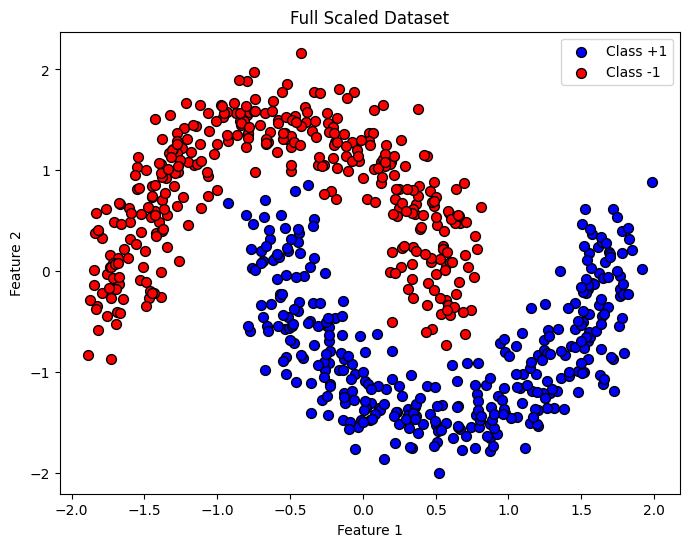



============================ Custom SVM Model ====================

Alphas (non-zero count): [[-0.14358476 -0.44223268]
 [-0.21810538  0.79063834]
 [ 0.94306978 -0.71325495]
 [ 0.62797108 -0.35596988]
 [-0.73841826  0.98544543]
 [-0.66859564  0.70340501]
 [ 0.61564738 -0.92846179]
 [-1.44887843 -0.21382186]
 [ 1.15670149 -0.37223671]
 [ 1.04936143 -0.74718702]
 [ 0.44200363 -1.14454872]
 [-0.43347486  0.17360893]
 [ 0.60092314 -0.43461218]
 [-1.34161773  0.55198232]
 [ 0.08235811  0.68097512]
 [ 0.57720123 -0.38704759]
 [ 1.51700254  0.24615817]
 [ 0.01720877 -0.80863179]
 [-0.37873667  0.84895681]
 [-0.63704313  0.31517815]
 [-0.3078985   1.05563457]
 [-0.53411478  0.42489505]
 [-0.14404884 -0.63653878]
 [ 0.22229157 -0.01967388]
 [ 0.03052386  0.71910196]
 [-0.26515531  1.04859518]
 [-0.36234665  0.03945086]
 [-0.75240949  0.46324454]
 [ 0.5837762  -0.33391967]
 [ 0.49148963 -0.18955652]
 [-0.80031398  1.22665452]
 [-1.43110979 -0.21587587]
 [-0.26155259 -0.02087578]
 [-1.20377759 

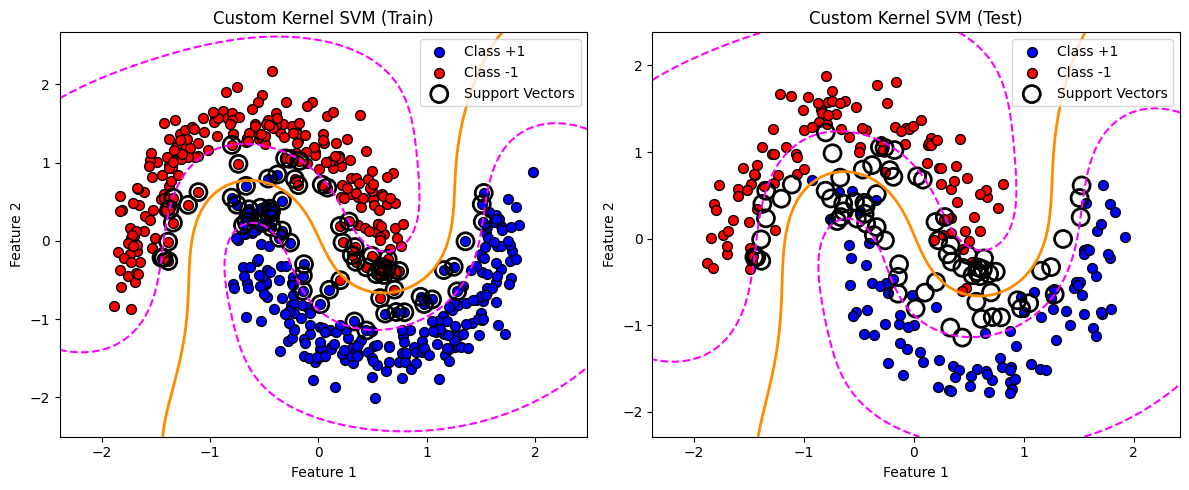



============================ Scikit-Learn SVM Model ====================

Support Vectors Count: 75
Train Accuracy: 99.18%
Test Accuracy: 99.52%


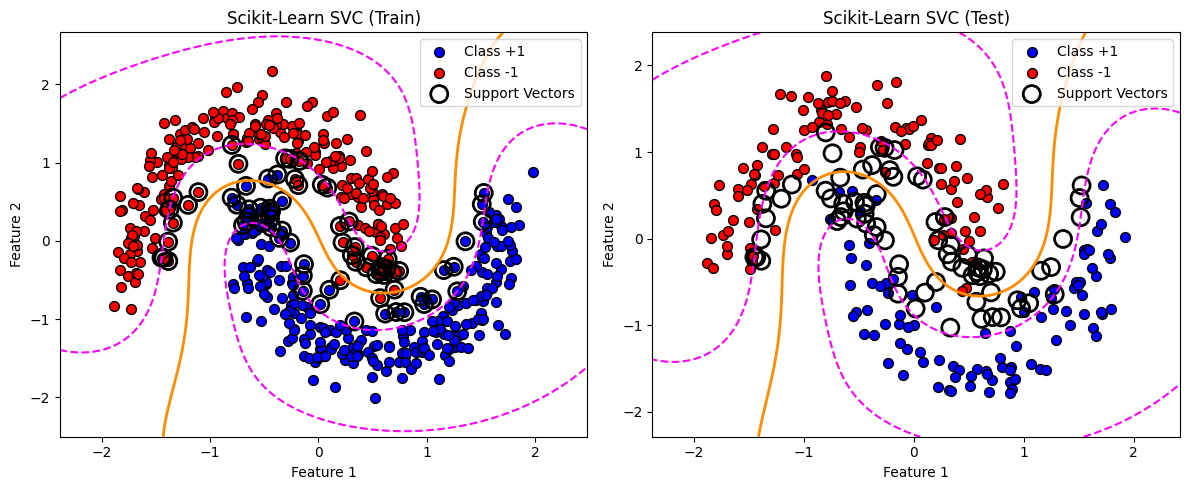



============================ Model Comparison ====================

Model                     Train Acc (%)   Test Acc (%)    #Support Vectors    
---------------------------------------------------------------------------
Custom Kernel SVM         99.18           99.52           76                  
Scikit-Learn SVC          99.18           99.52           75                  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys

# Suppress CVXOPT output by default for cleaner console output during runtime
solvers.options['show_progress'] = False


global_results = {}

# ==============================
# 1. DATA UTILITIES
# ==============================
def generate_nonlinear_data(n_samples=700, noise=0.12):
    """
    Generate 2D non-linear data (two moons) and encode labels {-1, 1}.
    """
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    y = np.where(y == 0, -1, 1)
    return X, y

def get_data_provider():
    """
    Generates data and splits it into train/test sets.
    """
    X, y = generate_nonlinear_data()
    # Apply standard scaling for better performance with RBF kernels
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

# ==============================
# 2. RBF KERNEL
# ==============================
def rbf_kernel(X1, X2, gamma=0.5):
    """
    Compute RBF (Gaussian) kernel between X1 and X2
    X1: (N1, Features)
    X2: (N2, Features)
    Returns: (N1, N2) kernel matrix
    """
    # Use broadcasting to efficiently compute squared Euclidean distance
    sq_dist = np.sum((X1[:, None, :] - X2[None, :, :])**2, axis=2)
    return np.exp(-gamma * sq_dist)

# ==============================
# 3. CUSTOM KERNEL SVM TRAINING & PREDICTION CLASS
# ==============================
class CustomKernelSVM:
    """
    Implements a kernel SVM using CVXOPT for quadratic programming.
    """
    def __init__(self, C=1.0, gamma=0.5):
        self.C = C
        self.gamma = gamma
        self.alphas = None
        self.b = None
        self.sv_X = None
        self.sv_y = None
        self.X_train = None
        self.y_train = None

    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        m = X.shape[0]

        # Compute Kernel Matrix
        K = rbf_kernel(X, X, self.gamma)

        # Define Objective Function (Dual Problem: Minimize 0.5*alpha^T P alpha - q^T alpha)
        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones(m))

        # Define Inequality constraints: 0 <= alpha_i <= C
        G = matrix(np.vstack((-np.eye(m), np.eye(m))))
        h = matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))

        # Define Equality constraint: sum_i alpha_i * y_i = 0
        A = matrix(y.astype(float), (1, m))
        b_eq = matrix(0.0)

        # Solve using convex optimization solver (CVXOPT)
        solution = solvers.qp(P, q, G, h, A, b_eq)
        self.alphas = np.array(solution['x']).flatten()

        # Identify support vectors
        sv_threshold = 1e-5
        sv_idx = np.where(self.alphas > sv_threshold)[0]
        self.sv_X = X[sv_idx]
        self.sv_y = y[sv_idx]
        sv_alpha = self.alphas[sv_idx]

        # Compute bias term b
        K_sv = K[sv_idx][:, sv_idx]
        self.b = np.mean(self.sv_y - np.dot(K_sv, sv_alpha * self.sv_y))

        return sv_idx

    def decision_function(self, X_test):
        """
        Calculates the decision values for prediction.
        f(x) = sum_i alpha_i * y_i * K(x_i, x) + b
        """
        K = rbf_kernel(X_test, self.X_train, self.gamma)
        decision_values = np.dot(K, self.alphas * self.y_train) + self.b
        return decision_values

    def predict(self, X_test):
        """ Predicts the class labels (-1 or 1). """
        decision_values = self.decision_function(X_test)
        return np.sign(decision_values)

    def score(self, X_test, y_test):
        """ Calculates the accuracy score. """
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

# ==============================
# 4. PLOTTING UTILITIES
# ==============================
def plot_whole_dataset(X, y):
    """
    Plot the full dataset for understanding.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==1,0], X[y==1,1], c='blue', edgecolors='k', s=50, label='Class +1')
    plt.scatter(X[y==-1,0], X[y==-1,1], c='red', edgecolors='k', s=50, label='Class -1')
    plt.title("Full Scaled Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

def plot_decision_boundary_with_margins(X, y, model_func, title, sv_points=None):
    """
    Plot decision boundary, margins, points, and support vectors.
    model_func expects input of shape (N, 2) and returns decision scores (N,).
    """
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xs, ys = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xs.ravel(), ys.ravel()]

    # Calculate decision function values for every point in the grid
    Z = model_func(grid).reshape(xs.shape)

    # Plot decision boundary (Z=0) and margins (Z=-1, Z=1)
    plt.contour(xs, ys, Z, levels=[0], colors='darkorange', linestyles='-', linewidths=2)
    plt.contour(xs, ys, Z, levels=[-1, 1], colors='magenta', linestyles='--', linewidths=1.5)

    # Plot data points
    plt.scatter(X[y==1,0], X[y==1,1], c='blue', edgecolors='k', s=50, label='Class +1')
    plt.scatter(X[y==-1,0], X[y==-1,1], c='red', edgecolors='k', s=50, label='Class -1')

    # Plot support vectors
    if sv_points is not None and len(sv_points) > 0:
        plt.scatter(sv_points[:,0], sv_points[:,1], s=150,
                    facecolors='none', edgecolors='black', linewidth=2, label='Support Vectors')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

def Plot_SVM_Results(svm_model, X_train, y_train, X_test, y_test, title_prefix):
    """Helper function to generate side-by-side train/test plots."""
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_decision_boundary_with_margins(
        X_train, y_train,
        lambda pts: svm_model.decision_function(pts),
        f"{title_prefix} (Train)", sv_points=svm_model.sv_X
    )
    plt.subplot(1,2,2)
    plot_decision_boundary_with_margins(
        X_test, y_test,
        lambda pts: svm_model.decision_function(pts),
        f"{title_prefix} (Test)", sv_points=svm_model.sv_X
    )
    plt.tight_layout()
    plt.show()

# ==============================
# 5. EXECUTION LOGIC
# ==============================

def execute_custom_svm(X_train, X_test, y_train, y_test):
    print("\n\n============================ Custom SVM Model ====================\n")
    C_val = 1.0
    gamma_val = 0.5
    custom_svm = CustomKernelSVM(C=C_val, gamma=gamma_val)
    sv_idx = custom_svm.train(X_train, y_train)

    # Accuracy Report
    train_acc_custom = custom_svm.score(X_train, y_train) * 100
    test_acc_custom = custom_svm.score(X_test, y_test) * 100

    print(f"Alphas (non-zero count): {custom_svm.sv_X}")
    print(f"Bias (b): {custom_svm.b:.4f}")
    print(f"Train Accuracy: {train_acc_custom:.2f}%")
    print(f"Test Accuracy: {test_acc_custom:.2f}%")

    # Store results globally
    global_results['custom'] = {
        'train_acc': train_acc_custom,
        'test_acc': test_acc_custom,
        'sv_count': len(custom_svm.sv_X)
    }

    Plot_SVM_Results(custom_svm, X_train, y_train, X_test, y_test, "Custom Kernel SVM")


def execute_scikitlearn_svm(X_train, X_test, y_train, y_test):
    print("\n\n============================ Scikit-Learn SVM Model ====================\n")
    # Scikit-learn SVC expects y labels to be numeric.
    svc = SVC(kernel='rbf', C=1.0, gamma=0.5)
    svc.fit(X_train, y_train)

    train_acc_svc = svc.score(X_train, y_train) * 100
    test_acc_svc = svc.score(X_test, y_test) * 100
    sv_X_svc = svc.support_vectors_

    # Patch and Dynamically add 'sv_X' attribute  the SVC model object(originally has no .sv_X ) to match the interface of my custom class for plotting function re-use
    svc.sv_X = sv_X_svc

    print(f"Support Vectors Count: {len(sv_X_svc)}")
    print(f"Train Accuracy: {train_acc_svc:.2f}%")
    print(f"Test Accuracy: {test_acc_svc:.2f}%")

    # Store results globally
    global_results['sklearn'] = {
        'train_acc': train_acc_svc,
        'test_acc': test_acc_svc,
        'sv_count': len(sv_X_svc)
    }

    Plot_SVM_Results(svc, X_train, y_train, X_test, y_test, "Scikit-Learn SVC")


def print_comparison_table():
    print("\n\n============================ Model Comparison ====================\n")
    print(f"{'Model':<25} {'Train Acc (%)':<15} {'Test Acc (%)':<15} {'#Support Vectors':<20}")
    print("-" * 75)

    if 'custom' in global_results:
        custom = global_results['custom']
        print(f"{'Custom Kernel SVM':<25} {custom['train_acc']:<15.2f} {custom['test_acc']:<15.2f} {custom['sv_count']:<20}")

    if 'sklearn' in global_results:
        sklearn = global_results['sklearn']
        print(f"{'Scikit-Learn SVC':<25} {sklearn['train_acc']:<15.2f} {sklearn['test_acc']:<15.2f} {sklearn['sv_count']:<20}")


# ==============================
# MAIN EXECUTION
# ==============================
if __name__ == "__main__":
    X_full, y_full, X_train, X_test, y_train, y_test = get_data_provider()

    print("\n\n============================ Plotting Entire Dataset For Understanding ====================\n")
    plot_whole_dataset(X_full, y_full)

    execute_custom_svm(X_train, X_test, y_train, y_test)

    execute_scikitlearn_svm(X_train, X_test, y_train, y_test)

    print_comparison_table()



# How Convex Optimization Ensures Optimal Solutions in AI Models

- Convex optimization ensures optimal solutions in AI models through its unique mathematical properties:

1. **Global Optimality**  
   In convex problems, the loss function is convex and the feasible region is a convex set. This guarantees that any local minimum is also a global minimum, meaning the solution found by the optimizer is the best possible.

2. **Predictable Convergence**  
   Convex optimization algorithms, like gradient descent or interior-point methods, reliably converge to the global minimum. There is no risk of getting trapped in suboptimal local minima, which is common in non-convex problems.

3. **Efficient Computation**  
   Convex formulations allow AI models to find solutions quickly and efficiently, even in high-dimensional spaces, without exhaustive search.

4. **Stable and Robust Solutions**  
   Small changes in input data or hyperparameters produce small, predictable changes in the solution, ensuring that the model behaves reliably.

5. **Practical AI Examples**  
   - **Support Vector Machines (SVMs):** Quadratic convex optimization finds the optimal separating hyperplane.  
   - **Logistic Regression:** Convex loss guarantees globally optimal weights.  
   - **Regularized Models (Lasso, Ridge):** Convex penalties ensure optimal parameter selection and prevent overfitting.

**Summary:**  
Convex optimization ensures that AI models reach the global best solution, converging reliably, efficiently, and robustly. This is why many foundational AI models are formulated as convex problems whenever possible.
